# regression tree

Regression trees rely on recursive binary partitioning of predictor space into a set of hyperrectangles to approximate some unknown function. 

regression tree can do with the non-linear problem, with multiple features
build from top to down
leaf with a number of 20 or depend on the observation size
the pruning for a regression tree is to reduce overfitting

How to prune -- cost complexity --  reiduals -- look at the sum of all leaf

Tree score= SSR +alpha\* number of leaves(This is tree complexity penalty)
use cross validation to find the alpha

# GAM and #pyGAM
using cross validation to find the number of smoother

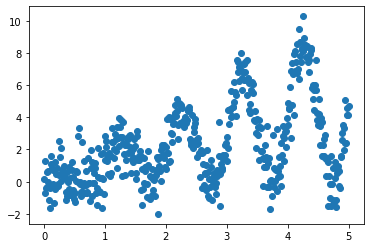

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X=np.linspace(0,5,500)
y=np.sin(X*2*np.pi)*X+X+np.random.randn(len(X))

plt.scatter(X,y)

In [20]:
from pygam import LinearGAM

#high lambda forces a straight line
gam=LinearGAM(lam=1e-6,n_splines=50).fit(X,y)



In [21]:
XX=gam.generate_X_grid(term=0, n=500)

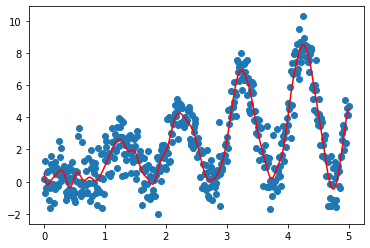

In [22]:
plt.plot(XX,gam.predict(XX),color='red')
plt.scatter(X,y)

In [23]:
gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     49.9993
Link Function:                     IdentityLink Log Likelihood:                                   -667.847
Number of Samples:                          500 AIC:                                             1437.6926
                                                AICc:                                            1449.5316
                                                GCV:                                                1.1437
                                                Scale:                                              0.9398
                                                Pseudo R-Squared:                                   0.8657
Feature Function                  Lam

C:\Users\maoru\AppData\Local\Temp\ipykernel_41224\869333826.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [33]:
## with cross validation of Leave one out 
from sklearn.model_selection import cross_validate
from pygam import LinearGAM
lams=np.logspace(-4,0,100)
gam=LinearGAM(n_splines=50).fit(X,y)

In [34]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     28.6923
Link Function:                     IdentityLink Log Likelihood:                                  -672.6846
Number of Samples:                          500 AIC:                                             1404.7538
                                                AICc:                                            1408.6375
                                                GCV:                                                1.0201
                                                Scale:                                              0.9153
                                                Pseudo R-Squared:                                    0.863
Feature Function                  Lam

C:\Users\maoru\AppData\Local\Temp\ipykernel_41224\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [35]:
gam.gridsearch(X,y, lam=lams)

100% (100 of 100) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

In [36]:
gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     26.1906
Link Function:                     IdentityLink Log Likelihood:                                   -674.258
Number of Samples:                          500 AIC:                                              1402.897
                                                AICc:                                            1406.1463
                                                GCV:                                                 1.011
                                                Scale:                                              0.9161
                                                Pseudo R-Squared:                                   0.8622
Feature Function                  Lam

C:\Users\maoru\AppData\Local\Temp\ipykernel_41224\869333826.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
